<a href="https://colab.research.google.com/github/proyectoiatalentotech/talentotechiabasic/blob/main/proyecto_IA_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informaciòn del dataset adquirido y explicaciòn de los datos del Mintic [Talento TI
Ciencia, Tecnología e Innovación](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Talento-TI/vruy-hj2m/about_data) La iniciativa Talento TI del MinTIC es una de las apuestas del Plan Vive Digital para la Gente, que busca promover la formación de los colombianos en carreras TI para impulsar la competitividad, la investigación, la innovación y la proyección internacional del sector TI del país.

#Carga de librerias a utilizar en el proyecto

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importo los datos al dataset ti_datos_df directamente de la pagina datos.gov.co

In [93]:
#ti_datos_df = pd.read_csv("https://www.datos.gov.co/resource/vruy-hj2m.csv")
#Opcion Datos completos desde Internet
ti_datos_df = pd.read_csv("https://raw.githubusercontent.com/proyectoiatalentotech/talentotechiabasic/refs/heads/main/datos_proyecto2.csv", sep=";")
#Opcio datos cargados en la maquina
#ti_datos_df = pd.read_csv ("datos_proyecto2.csv", sep=';')
ti_datos_df.shape

(46639, 35)

In [ ]:
ti_datos_df.head(2)

,programa,convenio,convocatoria,anio,id_beneficio,cc_ti_beneficiario,nombres,apellidos,email,coddepto,...,monto_comprometido,naturaleza_institucion,modalidad_programa,estado,observaciones,meta,fecha_actualizacion,codigo_municipio_residencia,codigo_municipio_ie,fecha_vigencia
0,NaN,ALIANZA 665,2017-1,2017,NaN,NaN,NaN,NaN,NaN,13,...,"35019630,61",S_I,PRESENCIAL,ACTIVO,NaN,7500.0,31/12/2017,13001,0,31/12/2017
1,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,19,...,"139002,2",S_I,VIRTUAL,ACTIVO,I.E. LA CABA�A,7500.0,31/12/2017,19300,11001,31/12/2017


#Reviso el tipo de datos que fue importado

In [ ]:
ti_datos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   programa                     0 non-null      float64
 1   convenio                     46639 non-null  object 
 2   convocatoria                 46639 non-null  object 
 3   anio                         46639 non-null  int64  
 4   id_beneficio                 0 non-null      float64
 5   cc_ti_beneficiario           0 non-null      float64
 6   nombres                      0 non-null      float64
 7   apellidos                    0 non-null      float64
 8   email                        0 non-null      float64
 9   coddepto                     46639 non-null  int64  
 10  departamento_de_residencia   46639 non-null  object 
 11  codmunicipio                 46639 non-null  int64  
 12  ciudad_de_residencia         46639 non-null  object 
 13  estrato         

#Cuento los datos/valores nulos

In [ ]:
ti_datos_df.isnull().sum()

,0
programa,46639
convenio,0
convocatoria,0
anio,0
id_beneficio,46639
cc_ti_beneficiario,46639
nombres,46639
apellidos,46639
email,46639
coddepto,0


#Procesado de datos eliminando columnas que no son necesarios para el preprocesado del dataset

##Columnas

In [ ]:
ti_datos_df = ti_datos_df.drop (['id_beneficio','cc_ti_beneficiario', 'nombres', 'apellidos', 'email', 'programa', 'observaciones'], axis='columns')

KeyError: "['id_beneficio', 'cc_ti_beneficiario', 'nombres', 'apellidos', 'email', 'programa', 'observaciones'] not found in axis"

In [ ]:
ti_datos_df = ti_datos_df.drop (['fecha_actualizacion', 'fecha_vigencia', 'codigo_municipio_residencia' ], axis='columns')

KeyError: "['fecha_actualizacion', 'fecha_vigencia', 'codigo_municipio_residencia'] not found in axis"

In [ ]:
ti_datos_df = ti_datos_df.drop (['coddepto' , 'codigo_departamento_ie', 'codmunicipio', 'depto_ie', 'depto_ie', 'codciudadie', 'ciudad_ie', 'codigo_ie', 'codigo_municipio_ie' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['meta' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['convenio' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['convocatoria' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['tipo_institucion' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['naturaleza_institucion' ], axis='columns')

In [ ]:
ti_datos_df = ti_datos_df.drop (['estado' ], axis='columns')

In [ ]:
ti_datos_df.isnull().sum()

#Conversion de tipo de datos a categoricos

In [ ]:
#cols_categoricas = ["genero", "estrato", "modalidad_programa"]
cols_categoricas = ["genero",  "modalidad_programa"]

ti_datos_df [cols_categoricas] = ti_datos_df[cols_categoricas].astype("category")

In [ ]:
#Corregir valor flotante
cols_numericas = ["monto_comprometido"]

ti_datos_df[cols_numericas] = ti_datos_df[cols_numericas].replace(',', '.', regex=True).astype("float")

In [ ]:
#Corregir valor int
cols_numericas = ["estrato"]

ti_datos_df[cols_numericas] = ti_datos_df[cols_numericas].replace(',', '.', regex=True).astype("int64")

In [ ]:
# los datos faltantes estan representados por '?'
ti_datos_df = ti_datos_df.replace('?',np.nan)

In [ ]:
#numero de datos por columna
ti_datos_df[ti_datos_df.isna().any(axis='columns')].count()

,0
programa,0
convenio,46639
convocatoria,46639
anio,46639
id_beneficio,0
cc_ti_beneficiario,0
nombres,0
apellidos,0
email,0
coddepto,46639


In [ ]:
ti_datos_df.head(5)

,programa,convenio,convocatoria,anio,id_beneficio,cc_ti_beneficiario,nombres,apellidos,email,coddepto,...,monto_comprometido,naturaleza_institucion,modalidad_programa,estado,observaciones,meta,fecha_actualizacion,codigo_municipio_residencia,codigo_municipio_ie,fecha_vigencia
0,NaN,ALIANZA 665,2017-1,2017,NaN,NaN,NaN,NaN,NaN,13,...,35019630.61,S_I,PRESENCIAL,ACTIVO,NaN,7500.0,31/12/2017,13001,0,31/12/2017
1,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,19,...,139002.20,S_I,VIRTUAL,ACTIVO,I.E. LA CABA�A,7500.0,31/12/2017,19300,11001,31/12/2017
2,NaN,CONTRATO 666 DE 2015,2017-1,2017,NaN,NaN,NaN,NaN,NaN,25,...,139002.20,S_I,VIRTUAL,ACTIVO,LIC ESPA�OL PEREZ GALDOS,7500.0,31/12/2017,25799,11001,31/12/2017
3,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,11,...,139002.20,S_I,VIRTUAL,ACTIVO,ESC. NORMAL SUPERIOR DISTRITAL MARIA MONTESSOR...,7500.0,31/12/2017,11001,11001,31/12/2017
4,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,11,...,139002.20,S_I,VIRTUAL,ACTIVO,ESC. NORMAL SUPERIOR DISTRITAL MARIA MONTESSOR...,7500.0,31/12/2017,11001,11001,31/12/2017


In [ ]:
# Ver todos los estratos registradas sin repetición
ti_datos_df['modalidad_programa'].unique()

['PRESENCIAL', 'VIRTUAL', 'A DISTANCIA']
Categories (3, object): ['A DISTANCIA', 'PRESENCIAL', 'VIRTUAL']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'ciudad'
ti_datos_df['ciudad_encoded'] = le.fit_transform(ti_datos_df['ciudad_de_residencia'])
ti_datos_df['nivel_de_programa_encoded'] = le.fit_transform(ti_datos_df['nivel_de_programa'])
ti_datos_df['genero_encoded'] = le.fit_transform(ti_datos_df['genero'])
ti_datos_df['tipo_programa_encoded'] = le.fit_transform(ti_datos_df['tipo_programa'])


# Mostrar el DataFrame después de la codificación
#print("\nDataFrame después de Label Encoding:")
#print(ti_datos_df)

In [ ]:
ti_datos_df['tipo_programa_encoded'] = le.fit_transform(ti_datos_df['tipo_programa'])

In [ ]:
ti_datos_df['departamento_encoded'] = le.fit_transform(ti_datos_df['departamento_de_residencia'])

In [ ]:
ti_datos_df.head(2)

,programa,convenio,convocatoria,anio,id_beneficio,cc_ti_beneficiario,nombres,apellidos,email,coddepto,...,meta,fecha_actualizacion,codigo_municipio_residencia,codigo_municipio_ie,fecha_vigencia,ciudad_encoded,nivel_de_programa_encoded,genero_encoded,tipo_programa_encoded,departamento_encoded
0,NaN,ALIANZA 665,2017-1,2017,NaN,NaN,NaN,NaN,NaN,13,...,7500.0,31/12/2017,13001,0,31/12/2017,152,5,1,4,5
1,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,19,...,7500.0,31/12/2017,19300,11001,31/12/2017,352,7,0,2,10


In [ ]:
ti_datos_df['modalidad_programa_encoded'] = le.fit_transform(ti_datos_df['modalidad_programa'])
df_one_hot = pd.get_dummies(ti_datos_df, columns=['modalidad_programa'], prefix='mod_prog_')

In [ ]:
# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(ti_datos_df, columns=['ciudad_de_residencia'], prefix='city_')
df_one_hot = pd.get_dummies(ti_datos_df, columns=['nivel_de_programa'], prefix='lev_prog_')
df_one_hot = pd.get_dummies(ti_datos_df, columns=['genero'], prefix='sex_')
df_one_hot = pd.get_dummies(ti_datos_df, columns=['tipo_programa'], prefix='type_prog_')

# Mostrar el DataFrame después de One-Hot Encoding
print("\nDataFrame después de One-Hot Encoding:")
#print(df_one_hot)
#ti_datos_df.info()
df_one_hot.head(2)
ti_datos_df = df_one_hot


DataFrame después de One-Hot Encoding:


In [ ]:
df_one_hot = pd.get_dummies(ti_datos_df, columns=['departamento_de_residencia'], prefix='depto_')

In [ ]:
ti_datos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   programa                     0 non-null      float64 
 1   convenio                     46639 non-null  object  
 2   convocatoria                 46639 non-null  object  
 3   anio                         46639 non-null  int64   
 4   id_beneficio                 0 non-null      float64 
 5   cc_ti_beneficiario           0 non-null      float64 
 6   nombres                      0 non-null      float64 
 7   apellidos                    0 non-null      float64 
 8   email                        0 non-null      float64 
 9   coddepto                     46639 non-null  int64   
 10  departamento_de_residencia   46639 non-null  object  
 11  codmunicipio                 46639 non-null  int64   
 12  ciudad_de_residencia         46639 non-null  object  
 13  e

In [ ]:
#Convertir genero a numerico
ti_datos_df["genero_num"] = ti_datos_df.apply(lambda x: 1 if x["genero"] == 'M' else 2, axis=1)

In [ ]:
ti_datos_df.head(2)

,programa,convenio,convocatoria,anio,id_beneficio,cc_ti_beneficiario,nombres,apellidos,email,coddepto,...,genero_encoded,tipo_programa_encoded,departamento_encoded,modalidad_programa_encoded,type_prog__CONTENIDOS,type_prog__ELECTRONICA,type_prog__OTROS,type_prog__TELEMATICA,type_prog__TI,genero_num
0,NaN,ALIANZA 665,2017-1,2017,NaN,NaN,NaN,NaN,NaN,13,...,1,4,5,1,False,False,False,False,True,1
1,NaN,CONTRATO 666 DE 2015,2017-2,2017,NaN,NaN,NaN,NaN,NaN,19,...,0,2,10,2,False,False,True,False,False,2


#Guardo los datos procesados

In [ ]:
# prompt: almacenar en una variable la fecha actual
import datetime
current_datetime = datetime.datetime.now()
current_date = current_datetime.date()
current_date
archivo = ('archivo_procesado_'+str(current_date)+'.parquet')
archivo

'archivo_procesado_2024-12-23.parquet'

In [ ]:
ti_datos_df.to_parquet(archivo,
                      index=False)

#Leactura de datos parquet

In [ ]:
#Lectura de datos desde la ruta local
#ti_datos_df = pd.read_parquet(archivo)

In [94]:
#Lectura de datos desde la ruta de internet de gibhub
ti_datos_df = pd.read_parquet("https://github.com/proyectoiatalentotech/talentotechiabasic/raw/refs/heads/main/archivo_procesado_2024-12-23.parquet")

In [95]:
#Descripcion estadistica
ti_datos_df.describe()

,anio,estrato,monto_comprometido,ciudad_encoded,nivel_de_programa_encoded,genero_encoded,tipo_programa_encoded,departamento_encoded,modalidad_programa_encoded,genero_num
count,46639.000000,46639.000000,4.663900e+04,46639.000000,46639.000000,46639.000000,46639.000000,46639.000000,46639.000000,46639.000000
mean,2015.630502,2.102061,4.214927e+06,409.426253,5.449752,0.511782,2.768070,13.307189,1.601857,1.488218
std,1.275635,1.062926,1.204651e+07,293.573196,2.111244,0.499867,1.006606,10.260403,0.497385,0.499867
min,2012.000000,1.000000,1.390022e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2015.000000,1.000000,1.390022e+05,98.000000,3.000000,0.000000,2.000000,4.000000,1.000000,1.000000
50%,2016.000000,2.000000,1.390022e+05,400.000000,7.000000,1.000000,2.000000,10.000000,2.000000,1.000000
75%,2017.000000,3.000000,4.065600e+06,605.000000,7.000000,1.000000,4.000000,23.000000,2.000000,2.000000
max,2018.000000,6.000000,4.370000e+08,995.000000,7.000000,1.000000,4.000000,33.000000,2.000000,2.000000


In [88]:
ti_datos_df.head(2)

,anio,departamento_de_residencia,ciudad_de_residencia,estrato,genero,nivel_de_programa,nombre_ie,programa_academico,monto_comprometido,modalidad_programa,...,genero_encoded,tipo_programa_encoded,departamento_encoded,modalidad_programa_encoded,type_prog__CONTENIDOS,type_prog__ELECTRONICA,type_prog__OTROS,type_prog__TELEMATICA,type_prog__TI,genero_num
0,2017,BOLIVAR,CARTAGENA,1,M,TECNOLOGIA,UNIVERSIDAD TECNOLOGICA DE BOLIVAR,INGENIERIA DE SISTEMAS,35019630.61,PRESENCIAL,...,1,4,5,1,False,False,False,False,True,1
1,2017,CAUCA,GUACHENE,1,F,VOCACIONAL,PUNTO VIVE DIGITAL SUR BRITALIA,HACIATI,139002.20,VIRTUAL,...,0,2,10,2,False,False,True,False,False,2


<Axes: xlabel='genero'>

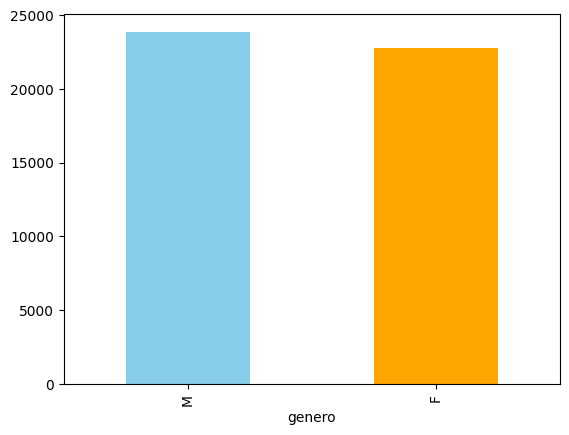

In [ ]:
# visulizar la distribucion de los datos de hombres y mujeres

ti_datos_df["genero"].value_counts().plot(kind="bar",
                                           color=['skyblue', 'orange'])

In [ ]:
cols_numericas = ["anio", "estrato", "nivel_de_programa_encoded", "departamento_encoded", "genero", "estrato" ]

cols_numericas

['anio',
 'estrato',
 'nivel_de_programa_encoded',
 'departamento_encoded',
 'genero',
 'estrato']

In [ ]:
# Ver todos los estratos registradas sin repetición
ti_datos_df['genero_num'].unique()

array([1, 2])

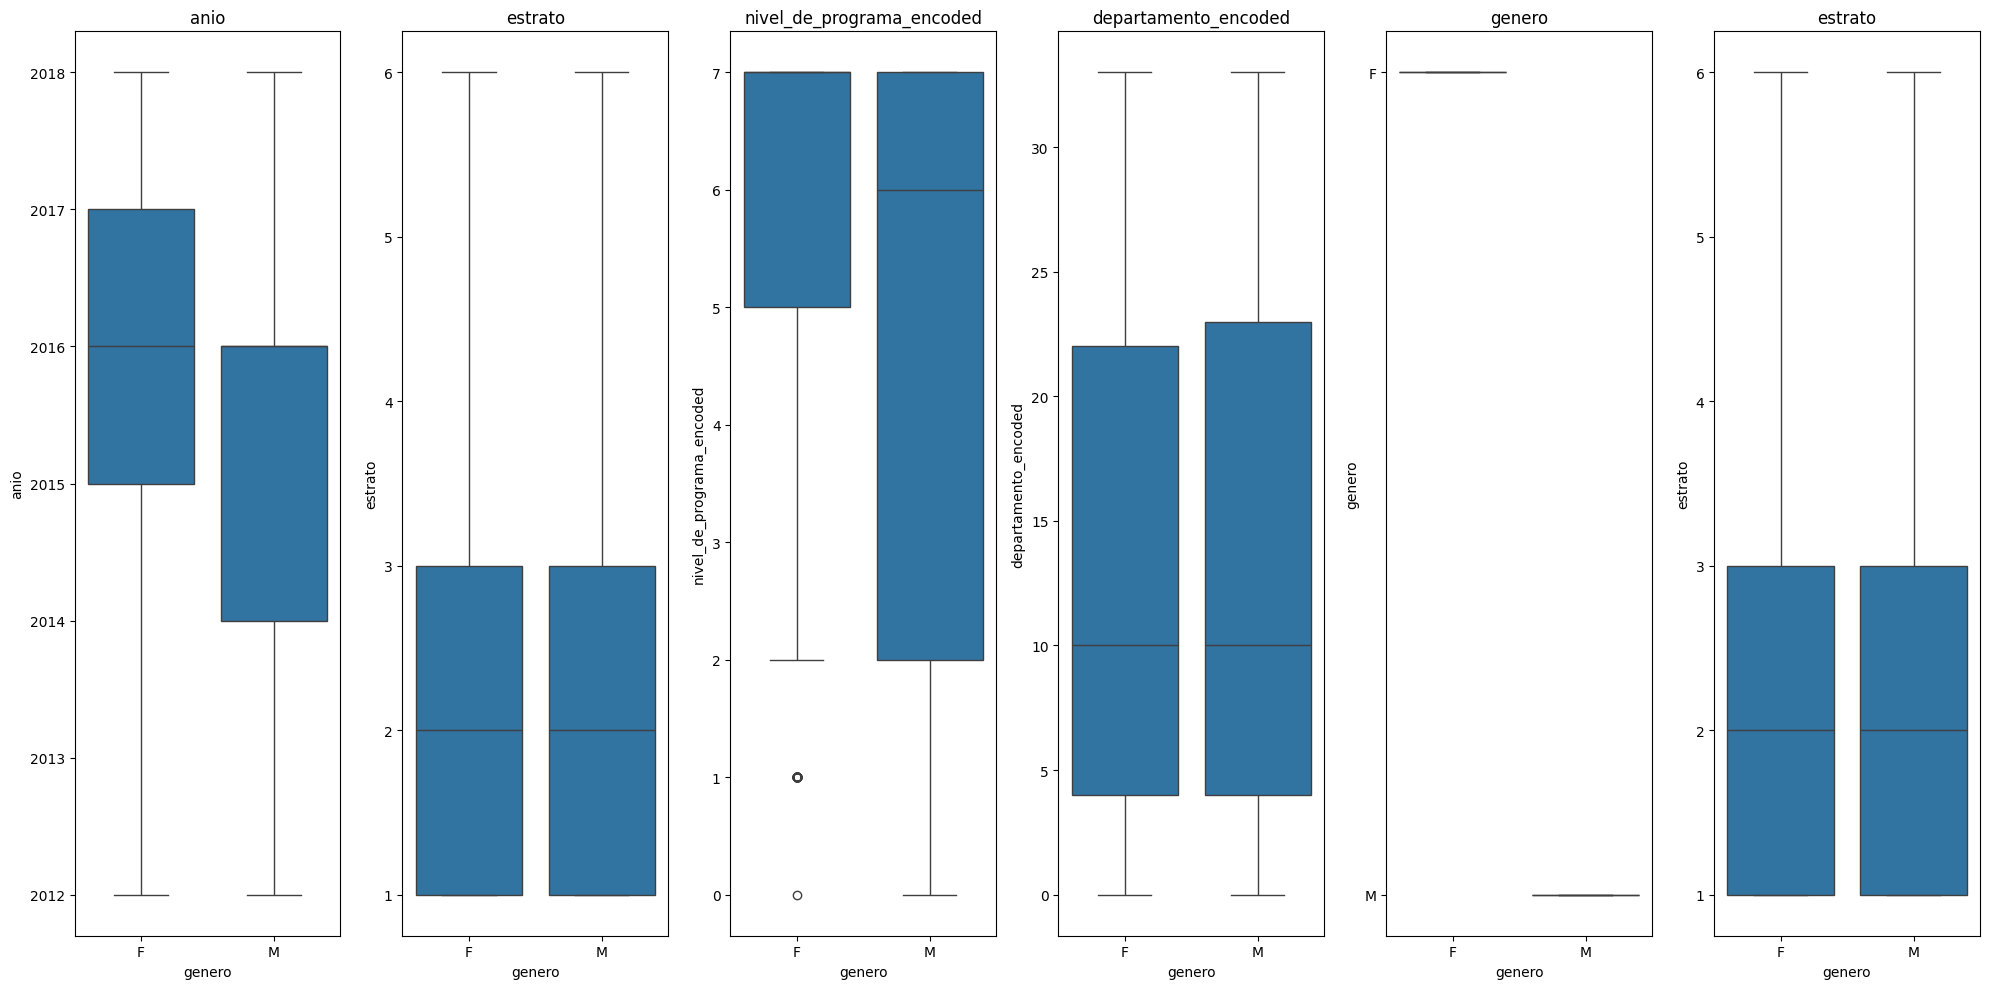

In [ ]:
# son 2 variables numericas
fig, axes = plt.subplots(1, 6, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(cols_numericas):
    sns.boxplot(data=ti_datos_df,
                x="genero", y=col,
                ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = ti_datos_df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
corr_matrix.head()

,anio,estrato,monto_comprometido,ciudad_encoded,nivel_de_programa_encoded,genero_encoded,tipo_programa_encoded,departamento_encoded,genero_num,modalidad_programa_encoded
anio,1.000000,-0.123001,-0.073619,-0.094985,0.423628,-0.065116,-0.406837,-0.028677,0.065116,0.446886
estrato,-0.123001,1.000000,0.092096,-0.212803,-0.488016,0.145680,0.371621,-0.140999,-0.145680,-0.372143
monto_comprometido,-0.073619,0.092096,1.000000,-0.059574,-0.149066,0.148633,0.349669,-0.020587,-0.148633,-0.369353
ciudad_encoded,-0.094985,-0.212803,-0.059574,1.000000,0.087850,-0.023970,-0.072381,0.215289,0.023970,0.052840
nivel_de_programa_encoded,0.423628,-0.488016,-0.149066,0.087850,1.000000,-0.178064,-0.818396,0.047966,0.178064,0.871562


In [ ]:
ti_datos_df.isnull().sum()

,0
anio,0
departamento_de_residencia,0
ciudad_de_residencia,0
estrato,0
genero,0
nivel_de_programa,0
nombre_ie,0
programa_academico,0
monto_comprometido,0
modalidad_programa,0


In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(ti_datos_df.anio, ti_datos_df.monto_comprometido)
print('Coeficiente de Pearson:', pearson_coef)
print('P-value:', p_value)

Coeficiente de Pearson: -0.0736189000442527
P-value: 4.606437210512143e-57


In [ ]:
# Normalizar usando Min-Max Scaling
#ti_datos_df['Monto_Normalizado'] = (ti_datos_df['monto_comprometido'] - ti_datos_df['monto_comprometido'].min()) / (ti_datos_df['monto_comprometido'].max() - ti_datos_df['monto_comprometido'].min())

#print(ti_datos_df['Monto_Normalizado'])

0        0.079844
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
46634    0.000000
46635    0.019495
46636    0.019495
46637    0.012859
46638    0.000000
Name: Monto_Normalizado, Length: 46639, dtype: float64


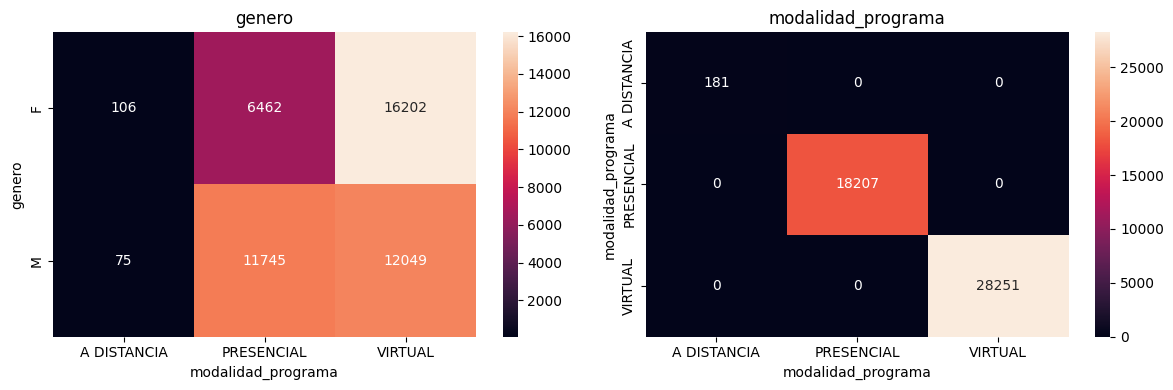

In [ ]:
# crear graficas de heatmap para ver la correlacion entre las variables categoricas y la variable survived
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes = axes.flatten()
for i, col in enumerate(cols_categoricas):
    sns.heatmap(pd.crosstab(ti_datos_df[col],
                            ti_datos_df["modalidad_programa"]),
                            annot=True, fmt="d",
                            ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()

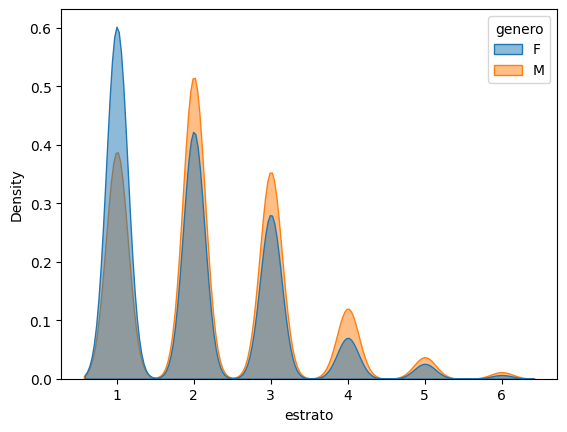

In [ ]:
#grafica con seaborn de la distribucion de fare por survived
sns.kdeplot(data=ti_datos_df,  x='estrato',hue='genero',
            alpha=0.5, fill=True)
plt.xscale('linear')
#plt.ylabel("Costo del tiquete escala log")

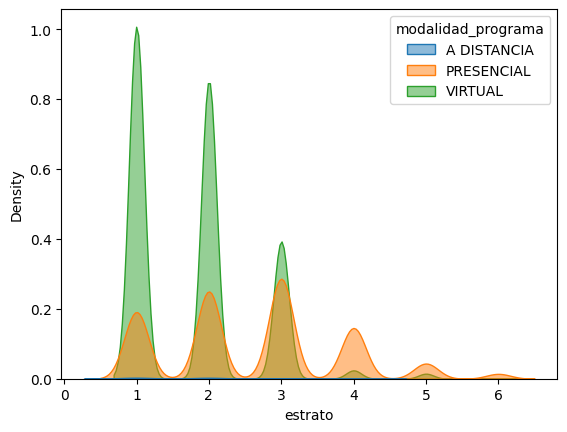

In [ ]:
#grafica con seaborn de la distribucion de fare por survived
sns.kdeplot(data=ti_datos_df,  x='estrato',hue='modalidad_programa',
            alpha=0.5, fill=True)
plt.xscale('linear')
#plt.ylabel("Costo del tiquete escala log")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

#Copia del datafreme para no alterar los datos

In [96]:
datos_df = ti_datos_df.copy()

In [97]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46639 entries, 0 to 46638
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   anio                        46639 non-null  int64   
 1   departamento_de_residencia  46639 non-null  object  
 2   ciudad_de_residencia        46639 non-null  object  
 3   estrato                     46639 non-null  int64   
 4   genero                      46639 non-null  category
 5   nivel_de_programa           46639 non-null  object  
 6   nombre_ie                   46639 non-null  object  
 7   programa_academico          46639 non-null  object  
 8   monto_comprometido          46639 non-null  float64 
 9   modalidad_programa          46639 non-null  category
 10  ciudad_encoded              46639 non-null  int64   
 11  nivel_de_programa_encoded   46639 non-null  int64   
 12  genero_encoded              46639 non-null  int64   
 13  tipo_programa_en

In [ ]:
# Normalizar usando Min-Max Scaling
datos_df['Monto_Normalizado'] = (ti_datos_df['monto_comprometido'] - ti_datos_df['monto_comprometido'].min()) / (ti_datos_df['monto_comprometido'].max() - ti_datos_df['monto_comprometido'].min())
# Normalizar usando Z-Score
datos_df['Monto_Estandarizado'] = (ti_datos_df['monto_comprometido'] - ti_datos_df['monto_comprometido'].mean()) / ti_datos_df['monto_comprometido'].std()



print(datos_df['Monto_Estandarizado'])
print(datos_df['Monto_Normalizado'])

0        2.557148
1       -0.338349
2       -0.338349
3       -0.338349
4       -0.338349
           ...   
46634   -0.338349
46635    0.368628
46636    0.368628
46637    0.127987
46638   -0.338349
Name: Monto_Estandarizado, Length: 46639, dtype: float64
0        0.079844
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
46634    0.000000
46635    0.019495
46636    0.019495
46637    0.012859
46638    0.000000
Name: Monto_Normalizado, Length: 46639, dtype: float64


In [ ]:
corr_matrix = datos_df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
corr_matrix.head()

,anio,estrato,monto_comprometido,ciudad_encoded,nivel_de_programa_encoded,genero_encoded,tipo_programa_encoded,departamento_encoded,modalidad_programa_encoded,genero_num,Monto_Normalizado,Monto_Estandarizado
anio,1.000000,-0.123001,-0.073619,-0.094985,0.423628,-0.065116,-0.406837,-0.028677,0.446886,0.065116,-0.073619,-0.073619
estrato,-0.123001,1.000000,0.092096,-0.212803,-0.488016,0.145680,0.371621,-0.140999,-0.372143,-0.145680,0.092096,0.092096
monto_comprometido,-0.073619,0.092096,1.000000,-0.059574,-0.149066,0.148633,0.349669,-0.020587,-0.369353,-0.148633,1.000000,1.000000
ciudad_encoded,-0.094985,-0.212803,-0.059574,1.000000,0.087850,-0.023970,-0.072381,0.215289,0.052840,0.023970,-0.059574,-0.059574
nivel_de_programa_encoded,0.423628,-0.488016,-0.149066,0.087850,1.000000,-0.178064,-0.818396,0.047966,0.871562,0.178064,-0.149066,-0.149066


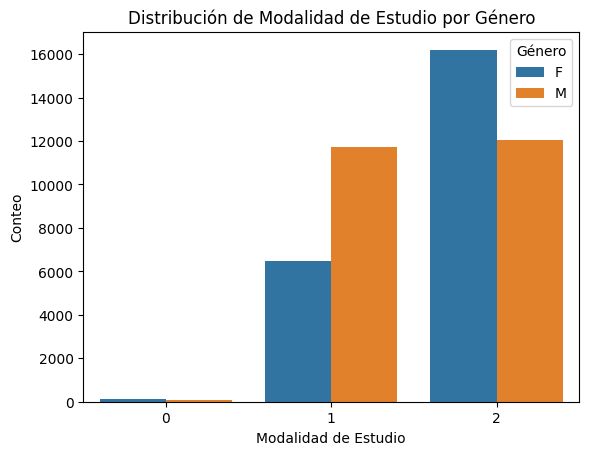

In [ ]:
# Gráfico de conteo para género y modalidad de estudio
sns.countplot(data=datos_df, x='modalidad_programa_encoded', hue='genero')
plt.title('Distribución de Modalidad de Estudio por Género')
plt.xlabel('Modalidad de Estudio')
plt.ylabel('Conteo')
plt.legend(title='Género')
plt.show()

In [ ]:
# Estadísticas descriptivas
print(datos_df.groupby('genero')['modalidad_programa_encoded'].value_counts(normalize=True))

genero  modalidad_programa_encoded
F       2                             0.711550
        1                             0.283794
        0                             0.004655
M       2                             0.504797
        1                             0.492061
        0                             0.003142
Name: proportion, dtype: float64


<ipython-input-63-fe765836e150>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(datos_df.groupby('genero')['modalidad_programa_encoded'].value_counts(normalize=True))


In [ ]:
datos_df['genero'] = datos_df['genero'].map({'M': 0, 'F': 1})  # Ejemplo de codificación
#datos_df['modalidad_estudio'] = datos_df['modalidad_estudio'].astype('category').cat.codes

#Calculo de proporcion de Hombres y Mujeres por Modalidad
Calcular la Proporción de Hombres y Mujeres por Modalidad
Agrupa los datos por modalidad y género, y calcula la proporción.

> Add blockquote



In [ ]:
# Contar el número de hombres y mujeres por modalidad
gender_counts = datos_df.groupby(['genero', 'modalidad_programa']).size().unstack(fill_value=0)

# Calcular la proporción
gender_proportions = gender_counts.div(gender_counts.sum(axis=1), axis=0)

# Mostrar las proporciones
print(gender_proportions)

modalidad_programa  A DISTANCIA  PRESENCIAL   VIRTUAL
genero                                               
1                      0.004655    0.283794  0.711550
0                      0.003142    0.492061  0.504797


<ipython-input-65-b9aced85c6d5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = datos_df.groupby(['genero', 'modalidad_programa']).size().unstack(fill_value=0)


##Análisis de Proporciones
Utilizar pandas para calcular la proporción de hombres y mujeres en cada modalidad.

In [ ]:
proporciones = datos_df.groupby(['genero', 'modalidad_programa_encoded']).size().unstack(fill_value=0)
proporciones = proporciones.div(proporciones.sum(axis=1), axis=0)
print(proporciones)
proporciones.info()

modalidad_programa_encoded         0         1         2
genero                                                  
1                           0.004655  0.283794  0.711550
0                           0.003142  0.492061  0.504797
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2 entries, 1 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2 non-null      float64
 1   1       2 non-null      float64
 2   2       2 non-null      float64
dtypes: float64(3)
memory usage: 174.0 bytes


<ipython-input-66-52005696bb59>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporciones = datos_df.groupby(['genero', 'modalidad_programa_encoded']).size().unstack(fill_value=0)


##Realizar Pruebas de Diferencias Significativas
Para determinar si hay diferencias significativas en la elección de modalidad según el género, puedes usar la prueba de chi-cuadrado.

In [ ]:
# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(gender_counts)

# Mostrar los resultados
print(f"Chi-cuadrado: {chi2}, p-valor: {p}, grados de libertad: {dof}")

Interpretar los Resultados
Proporciones: Las proporciones calculadas te mostrarán la distribución de hombres y mujeres en cada modalidad. Por ejemplo, si la proporción de hombres en una modalidad es significativamente mayor que la de mujeres, esto puede indicar una tendencia de género en esa modalidad.

##Prueba de Chi-Cuadrado
El p-valor resultante de la prueba de chi-cuadrado te indicará si hay diferencias significativas. Generalmente, un p-valor menor a 0.05 se considera significativo, lo que sugiere que la elección de modalidad está asociada con el género.

In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(datos_df['modalidad_programa_encoded'], datos_df['genero'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Resultados
print(f"Chi2: {chi2}, p-value: {p}")
if p < 0.05:
    print("Existen diferencias significativas en la elección de modalidad según el género.")
else:
    print("No existen diferencias significativas en la elección de modalidad según el género.")

#Modelo

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preparar los datos
X = datos_df[['modalidad_programa_encoded']]  # Reemplazar con las características relevantes
y = datos_df['genero']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      4812
           1       0.57      0.71      0.63      4516

    accuracy                           0.60      9328
   macro avg       0.61      0.60      0.60      9328
weighted avg       0.61      0.60      0.60      9328



##Matriz de confusión es útil para evaluar el rendimiento del modelo, mostrando el número de predicciones correctas e incorrectas.

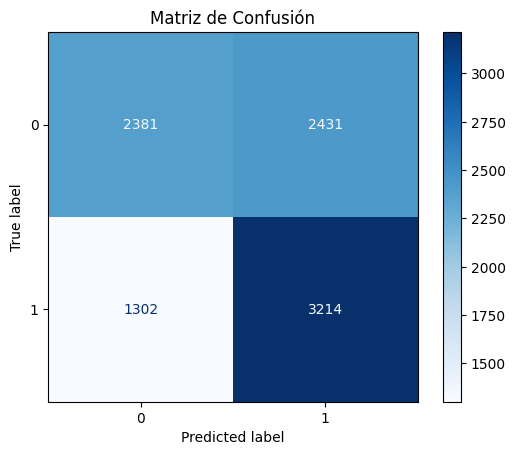

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

##Curva ROC y AUC
La curva ROC (Receiver Operating Characteristic) evalua la capacidad del modelo para distinguir entre clases.

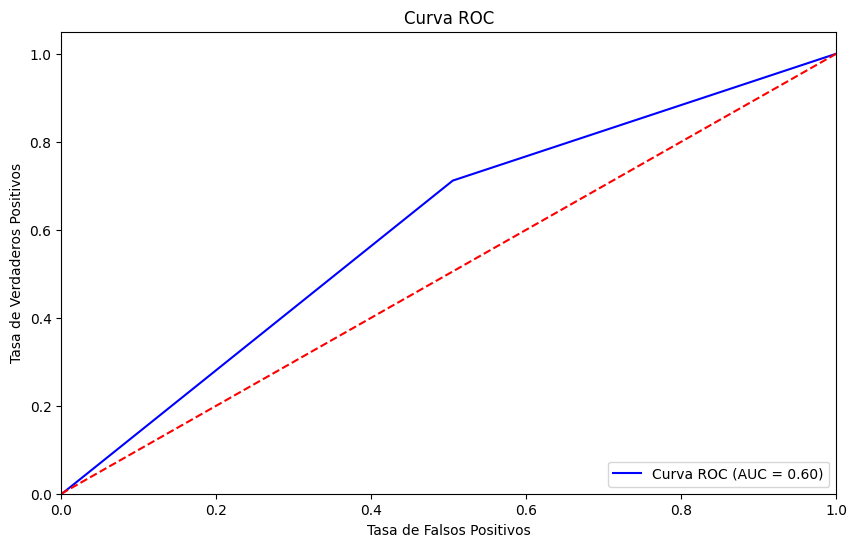

In [91]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Gráfico de la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

##Gráfico de Validación Cruzada
los resultados para ver cómo varía el rendimiento del modelo.

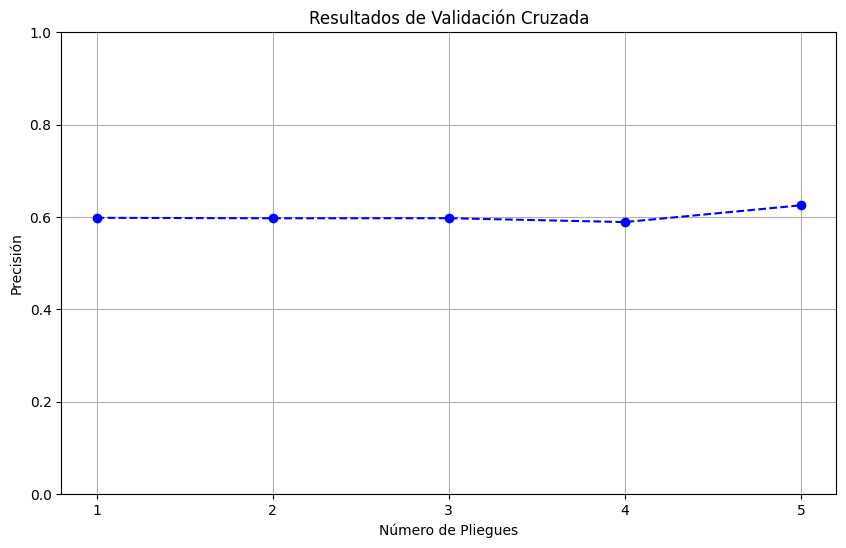

In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(modelo, X, y, cv=5)

# Gráfico de validación cruzada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores, marker='o', linestyle='--', color='blue')
plt.title('Resultados de Validación Cruzada')
plt.xlabel('Número de Pliegues')
plt.ylabel('Precisión')
plt.xticks(range(1, 6))
plt.ylim([0, 1])
plt.grid()
plt.show()

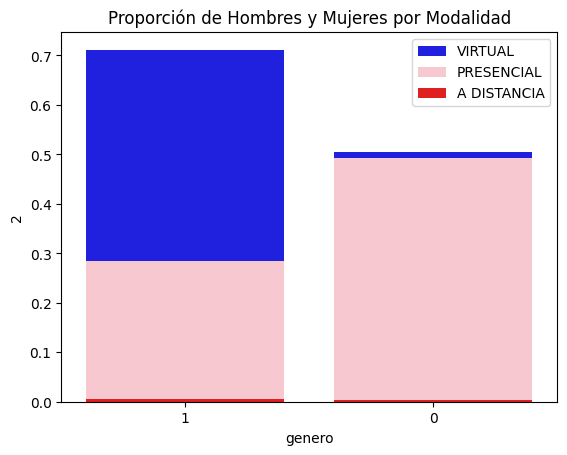

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de proporciones
sns.barplot(x=proporciones.index, y=proporciones[2], color='blue', label='VIRTUAL')
sns.barplot(x=proporciones.index, y=proporciones[1], color='pink', label='PRESENCIAL')
sns.barplot(x=proporciones.index, y=proporciones[0], color='red', label='A DISTANCIA')
plt.title('Proporción de Hombres y Mujeres por Modalidad')
plt.legend()
plt.show()

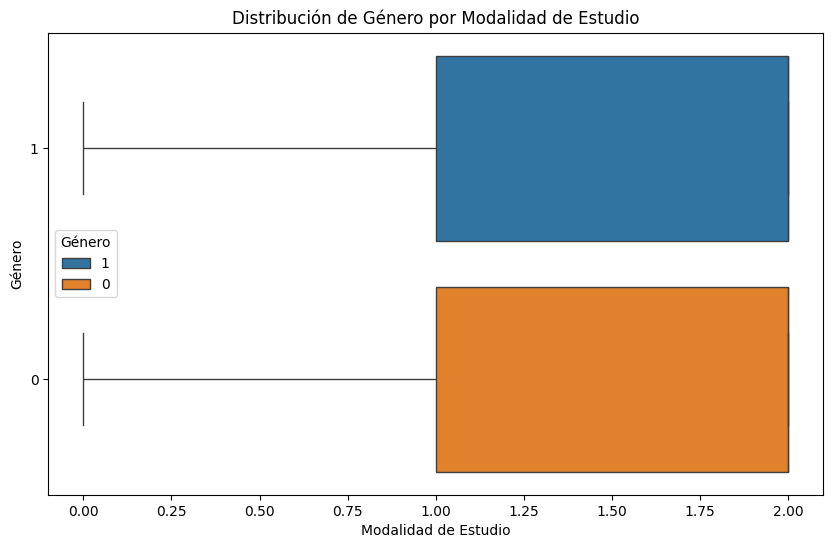

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='modalidad_programa_encoded', y='genero', hue='genero', data=datos_df)
plt.title('Distribución de Género por Modalidad de Estudio')
plt.xlabel('Modalidad de Estudio')
plt.ylabel('Género')
plt.legend(title='Género')
plt.show()

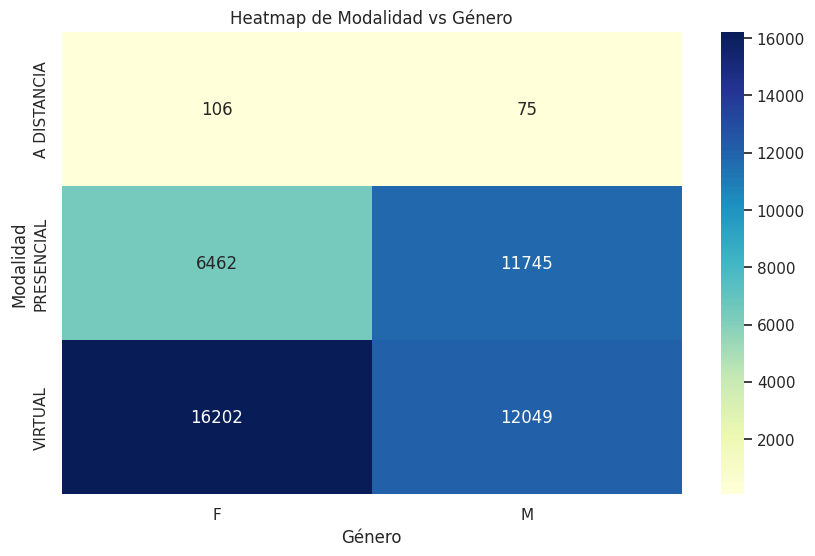

In [110]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(datos_df['modalidad_programa'], datos_df['genero'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap de Modalidad vs Género')
plt.xlabel('Género')
plt.ylabel('Modalidad')
plt.show()

#Guardar y carga el modelo creado

In [ ]:
import joblib

# Venimos de un model.fit() ejecutado correctamente
joblib.dump(modelo, 'trading_model.joblib')

['trading_model.joblib']

In [109]:
import joblib
import requests
from io import BytesIO

# Fetch the model file from the URL
mLink = "https://github.com/proyectoiatalentotech/talentotechiabasic/raw/refs/heads/main/trading_model.joblib"
mfile = BytesIO(requests.get(mLink).content)

modelo = joblib.load(mfile)